Load data, create tarball and expand

In [1]:
from pathlib import Path
from urllib import request
import tarfile
import pandas as pd


def load_housing_data():
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    tarball_path = Path("datasets/housing.tgz")
    Path("datasets").mkdir(parents=True, exist_ok=True)
    if not tarball_path.is_file():
        request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall("datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()

Examin top 5 rows

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


check data descriptions

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


check values of ocean proximity

In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

check other values

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


plot histogram for all values

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

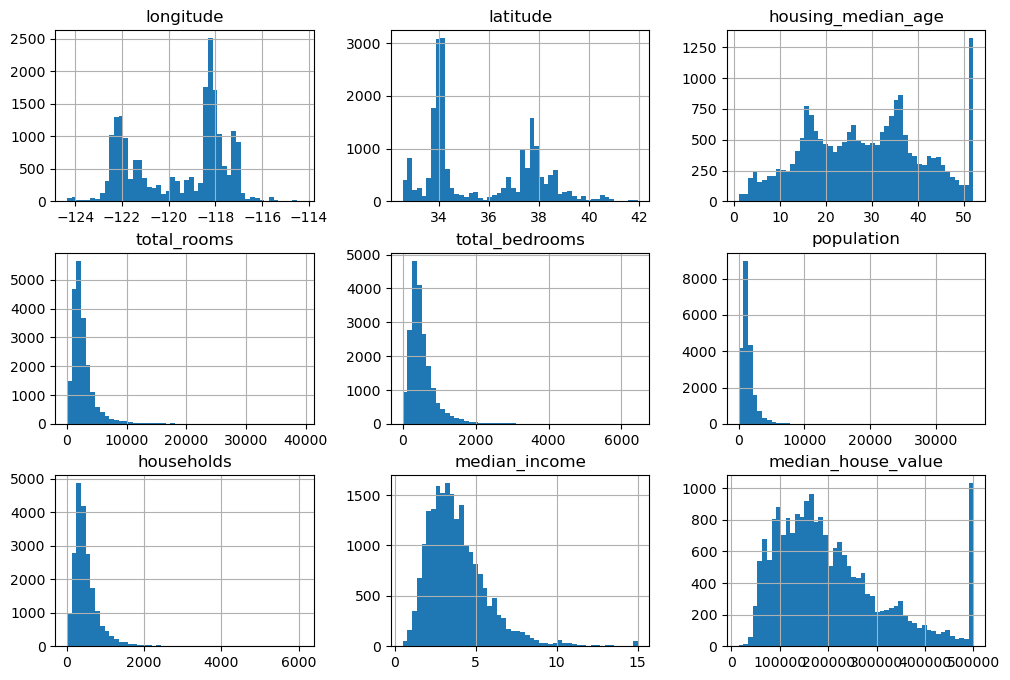

In [6]:
housing.hist(bins=50, figsize=(12, 8))

split dataset to 20% test and 80% train set

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Create in come category attripute. Most median incomes rang from 1.6 to 6, so we create categories: 0 to 1.5, 1.5 to 3, 3 to 4.5, 4.5 to 6 and 6 to inf

In [8]:
import numpy as np

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5],
)

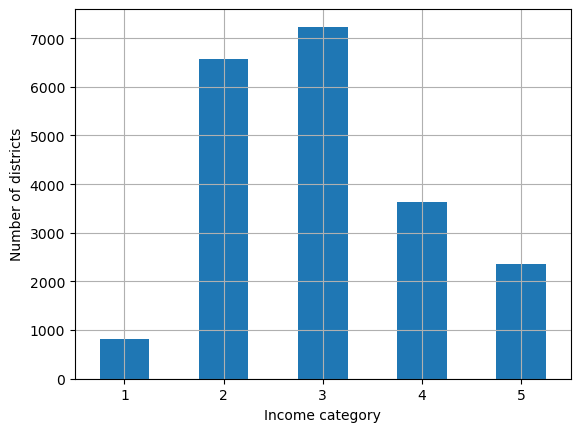

In [9]:
import matplotlib.pyplot as plt

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

create stratified train and test splits using train_test_split. As before test set size is 0.2

In [10]:
[strat_train_set, strat_test_set] = train_test_split(
    housing, stratify=housing["income_cat"], test_size=0.2, random_state=42
)

The percentage of each median category in train and test sets is same as that of the original dataset

In [11]:
strat_test_percentages = (
    strat_test_set["income_cat"].value_counts() / len(strat_test_set)
).round(2)
strat_train_percentages = (
    strat_train_set["income_cat"].value_counts() / len(strat_train_set)
).round(2)
original_percentages = (housing["income_cat"].value_counts() / len(housing)).round(2)

assert set(strat_test_percentages) == set(strat_train_percentages)
assert set(strat_train_percentages) == set(original_percentages)

As income_cat will not be used again so we can drop it. the variable is named set_ because it is a temporary variable

In [12]:
for set_ in (strat_train_set, strat_test_set, housing):
    set_.drop("income_cat", axis=1, inplace=True)

start Explore and Visualize the Data to Gain Insights
make a copy of original training data to avoid accedintal errors.

From now on the training data is called housing

In [13]:
housing = strat_train_set.copy()

In a scatter plot plot data. fig here shows location of data. darker areas have more data

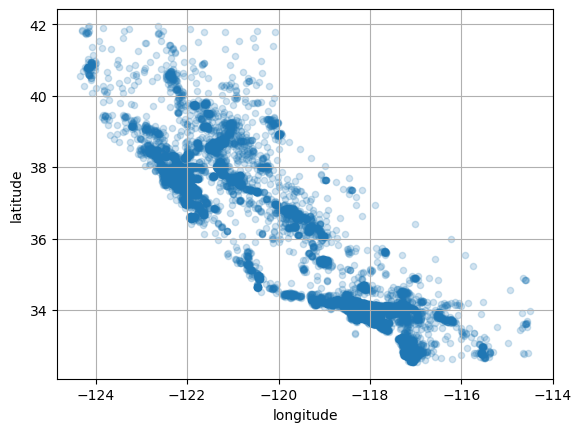

In [21]:
housing.plot(
    kind="scatter", x="longitude", y="latitude", grid=True, subplots=True, alpha=0.2
)
plt.show()

A bit adjustment to show data with population and median value

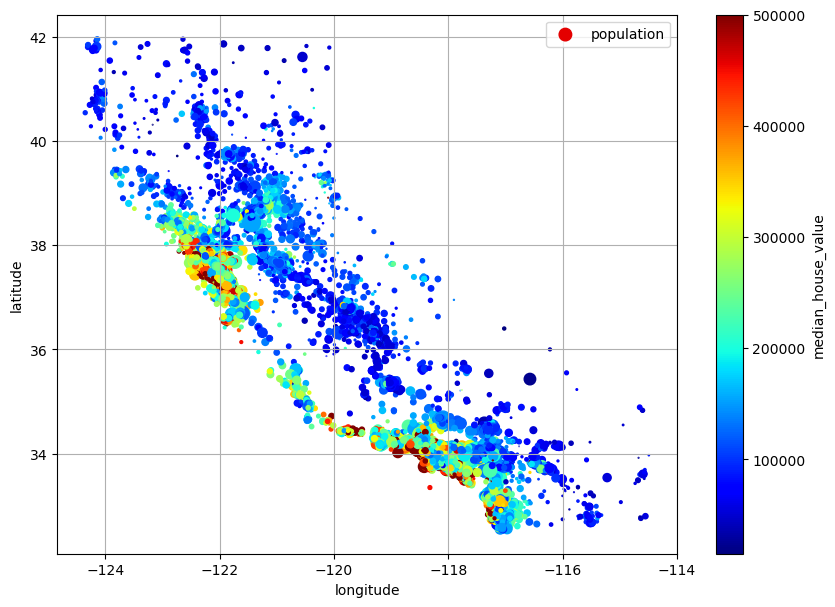

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

same with median income

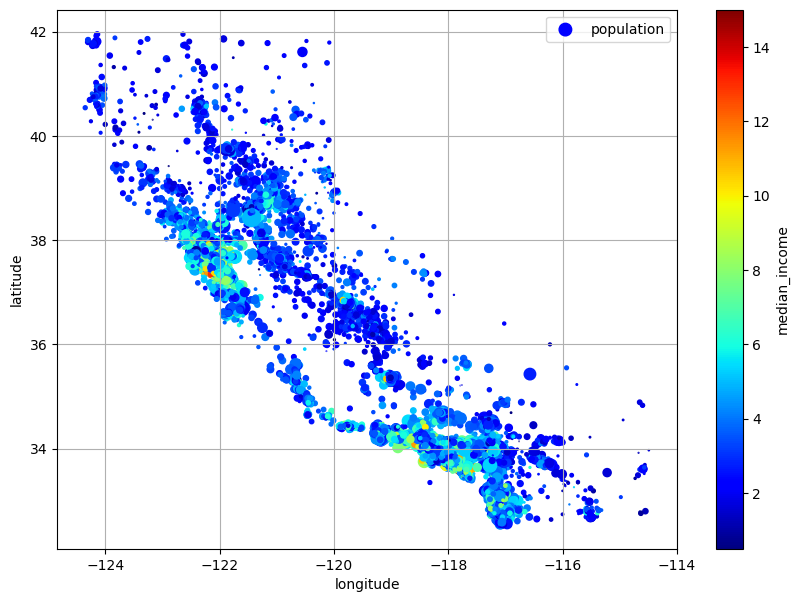

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_income", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

from figs above, we understand median income is relevant but not alone. we confirm this understanding by computing correlations between every pair of attributes

In [25]:
corr_matrix = housing.corr(numeric_only=True)

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64